In [20]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from pandas_datareader import data
from datetime import datetime
%matplotlib inline

In [21]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [22]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [23]:
#For loop for grabing yahoo finance data and setting as a dataframe
stocks = {}
for stock in tech_list:
    stocks[stock] = data.DataReader(stock,'yahoo',start,end)

In [24]:
stocks['AAPL']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.005280
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.256134
2019-06-04,179.830002,174.520004,175.440002,179.639999,30968000.0,177.521378
2019-06-05,184.990005,181.139999,184.279999,182.539993,29773400.0,180.387146
...,...,...,...,...,...,...
2020-05-22,319.230011,315.350006,315.769989,318.890015,20450800.0,318.890015
2020-05-26,324.239990,316.500000,323.500000,316.730011,31380500.0,316.730011
2020-05-27,318.709991,313.089996,316.140015,318.109985,28236300.0,318.109985


In [6]:
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [7]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-30,176.197189,1117.949951,124.201653,1816.319946
2019-05-31,173.005280,1103.630005,122.176575,1775.069946
2019-06-03,171.256134,1036.229980,118.383247,1692.689941
2019-06-04,177.521378,1053.050049,121.662903,1729.560059
2019-06-05,180.387146,1042.219971,124.300446,1738.500000
...,...,...,...,...
2020-05-22,318.890015,1410.420044,183.509995,2436.879883
2020-05-26,316.730011,1417.020020,181.570007,2421.860107
2020-05-27,318.109985,1417.839966,181.809998,2410.389893


In [8]:
df = data.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start='29-05-2019',end='29-05-2020')
df.head()

Attributes   Adj Close                                             Close  \
Symbols           AAPL         GOOG        MSFT         AMZN        AAPL   
Date                                                                       
2019-05-28  176.128006  1134.150024  124.626442  1836.430054  178.229996   
2019-05-29  175.288025  1116.459961  123.421265  1819.189941  177.380005   
2019-05-30  176.197189  1117.949951  124.201653  1816.319946  178.300003   
2019-05-31  173.005280  1103.630005  122.176575  1775.069946  175.070007   
2019-06-03  171.256134  1036.229980  118.383247  1692.689941  173.300003   

Attributes                                              High               \
Symbols            GOOG        MSFT         AMZN        AAPL         GOOG   
Date                                                                        
2019-05-28  1134.150024  126.160004  1836.430054  180.589996  1151.587036   
2019-05-29  1116.459961  124.940002  1819.189941  179.350006  1129.099976   
2019-05-30  1117.949951  125.730003  1816.319946  179.229996  1123.130005   
2019-05-31  1103.630005  123.680000  1775.069946  177.990005  1109.599976   
2019-06-03  1036.229980  119.839996  1692.689941  177.919998  1065.500000   

Attributes  ...         Low                     Open                           \
Symbols     ...        MSFT         AMZN        AAPL         GOOG        MSFT   
Date        ...                                                                 
2019-05-28  ...  126.050003  1827.349976  178.919998  1134.000000  126.980003   
2019-05-29  ...  124.040001  1807.530029  176.419998  1127.520020  125.379997   
2019-05-30  ...  124.779999  1807.829956  177.949997  1115.540039  125.260002   
2019-05-31  ...  123.320000  1772.699951  176.229996  1101.290039  124.230003   
2019-06-03  ...  119.010002  1672.000000  175.600006  1065.500000  123.849998   

Attributes                   Volume                                    
Symbols            AMZN        AAPL       GOOG        MSFT       AMZN  
Date                                                                   
2019-05-28  1832.750000  27948200.0  1365000.0  23128400.0  3200000.0  
2019-05-29  1823.119995  28481200.0  1538200.0  22763100.0  4279000.0  
2019-05-30  1825.489990  21218400.0   951900.0  16829600.0  3146900.0  
2019-05-31  1790.010010  27043600.0  1507800.0  26646800.0  4618800.0  
2019-06-03  1760.010010  40396100.0  5130600.0  37983600.0  9098700.0  

[5 rows x 24 columns]

In [9]:
#df0 = data.get_data_yahoo(symbols='AMZN',start='29-05-2019',end='29-05-2020')
#df1 = data.get_data_yahoo(symbols='MSFT',start='29-05-2019',end='29-05-2020')
#df2 = data.get_data_yahoo(symbols='GOOG',start='29-05-2019',end='29-05-2020')
#df3 = data.get_data_yahoo(symbols='AAPL',start='29-05-2019',end='29-05-2020')


In [10]:
#df0.head()

In [11]:
#import webbrowser

In [12]:
#web = 'https://in.finance.yahoo.com/quote/AAPL/history?p=AAPL'

In [13]:
#webbrowser.open(web)

In [14]:
#data1= pd.read_clipboard()

In [15]:
#data1.head()

In [16]:
amzn=data.get_data_yahoo(symbols='AMZN',start='29-05-2019',end='29-05-2020')
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-28,1849.270020,1827.349976,1832.750000,1836.430054,3200000,1836.430054
2019-05-29,1830.000000,1807.530029,1823.119995,1819.189941,4279000,1819.189941
2019-05-30,1829.469971,1807.829956,1825.489990,1816.319946,3146900,1816.319946
2019-05-31,1795.589966,1772.699951,1790.010010,1775.069946,4618800,1775.069946
2019-06-03,1766.290039,1672.000000,1760.010010,1692.689941,9098700,1692.689941


In [17]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-05-28 to 2020-05-29
Data columns (total 6 columns):
High         255 non-null float64
Low          255 non-null float64
Open         255 non-null float64
Close        255 non-null float64
Volume       255 non-null int64
Adj Close    255 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


1.) What was the change in price of the stock over time?

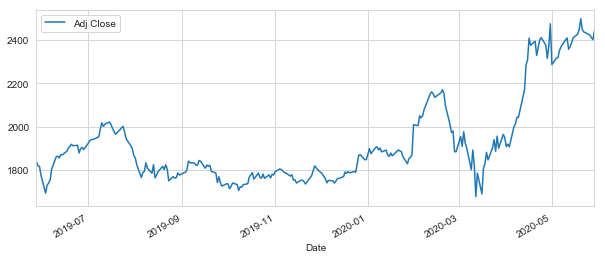

In [18]:
# Let's see a historical view of the closing price
amzn['Adj Close'].plot(legend=True,figsize=(10,4))

In [25]:
#df0['Adj Close'].plot(legend=True,figsize=(10,4))

2.) What was the daily return of the stock on average?

In [26]:
# We'll use pct_change to find the percent change for each day
amzn['Daily Return'] = amzn['Adj Close'].pct_change()
amzn['Daily Return']

Date
2019-05-28         NaN
2019-05-29   -0.009388
2019-05-30   -0.001578
2019-05-31   -0.022711
2019-06-03   -0.046409
                ...   
2020-05-22   -0.004030
2020-05-26   -0.006164
2020-05-27   -0.004736
2020-05-28   -0.003854
2020-05-29    0.017188
Name: Daily Return, Length: 255, dtype: float64

In [ ]:
#amzn['Daily Return'].plot(legend= True,figsize=(10,6))

3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' daily returns?

In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets

In [ ]:
tech_rets.plot(legend= True,figsize=(10,6))

In [ ]:
sns.pairplot(tech_rets.dropna())

In [ ]:
sns.jointplot('AAPL','GOOG',data=tech_rets,kind='scatter')

4.) What was the correlation between different stocks' closing prices?

In [ ]:
close_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Close']
close_df

In [ ]:
sns.jointplot('AAPL','MSFT',close_df,kind='scatter')

In [ ]:
close_df.plot(legend= True,figsize=(10,6))

In [ ]:
df['Close'].plot(legend= True,figsize=(10,6))

## Rolling Means (Trends and Seasonality)

In [ ]:
amzn_adj_close = amzn['Adj Close']

# Short moving window rolling mean
amzn['32'] = amzn_adj_close.rolling(window=6).mean()

# Long moving window rolling mean
amzn['100'] = amzn_adj_close.rolling(window=10).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
amzn[['Adj Close', '32', '100']].plot(title="AMZN")

# Show plot
plt.show()
